In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# Import da base de dados e primeiros registros

In [2]:
dados = pd.read_csv("insurance.csv")
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Informações sobre o dataset

In [3]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dados.shape

(1338, 7)

In [5]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Tratativa de dados não numéricos (sex, smoker e region)

In [6]:
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_region = LabelEncoder()

dados['sex'] = label_encoder_sex.fit_transform(dados['sex'])
dados['smoker'] = label_encoder_smoker.fit_transform(dados['smoker'])
dados['region'] = label_encoder_region.fit_transform(dados['region'])

print("Relação sex:", dict(zip(label_encoder_sex.classes_, range(len(label_encoder_sex.classes_)))))
print("Relação smoker:", dict(zip(label_encoder_smoker.classes_, range(len(label_encoder_smoker.classes_)))))
print("Relação region:", dict(zip(label_encoder_region.classes_, range(len(label_encoder_region.classes_)))))

dados.head()


Relação sex: {'female': 0, 'male': 1}
Relação smoker: {'no': 0, 'yes': 1}
Relação region: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Verificando correlações entre os dados

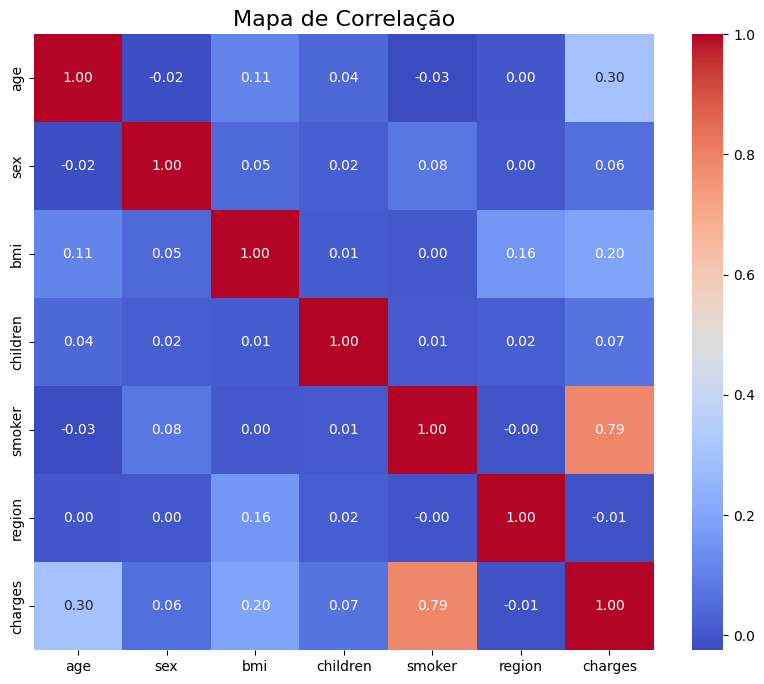

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Correlação", fontsize=16)
plt.show()

Média para fumantes: 32050.23183153284
Média para não fumantes: 8434.268297856204


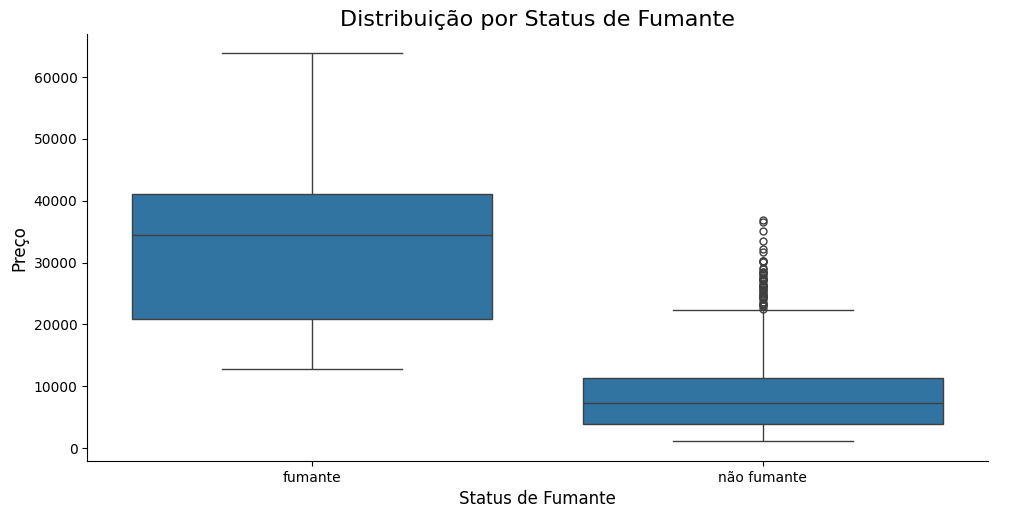

In [8]:

mean_charges_smoker = dados[dados['smoker'] == 1]['charges'].mean()
mean_charges_non_smoker = dados[dados['smoker'] == 0]['charges'].mean()
print(f'Média para fumantes: {mean_charges_smoker}')
print(f'Média para não fumantes: {mean_charges_non_smoker}')

dados_plot = dados.copy()

dados_plot['smoker'] = dados_plot['smoker'].replace({0: 'não fumante', 1: 'fumante'})

sns.catplot(x='smoker', y='charges', data=dados_plot, kind='box', height=5, aspect=2)

plt.title("Distribuição por Status de Fumante", fontsize=16)
plt.xlabel("Status de Fumante", fontsize=12)
plt.ylabel("Preço", fontsize=12)
plt.show()


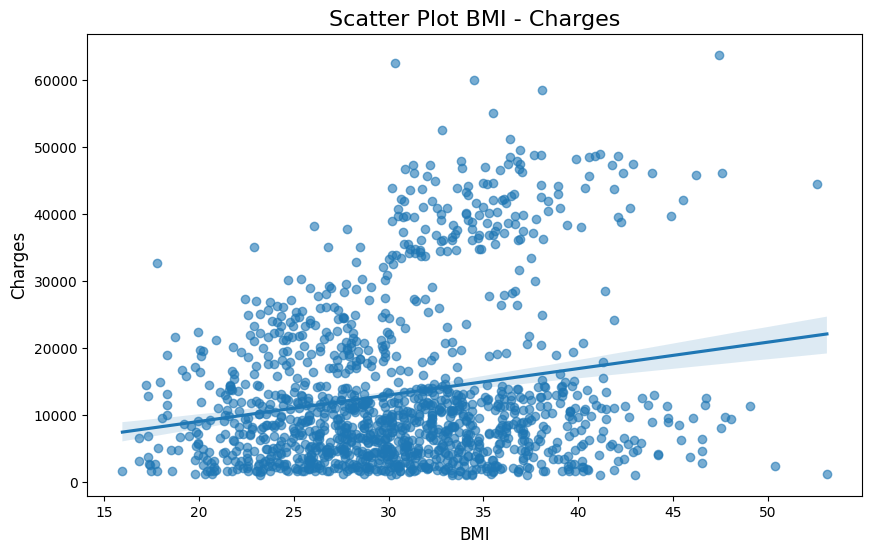

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=dados, scatter_kws={'alpha': 0.6})
plt.title("Scatter Plot BMI - Charges", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.show()

# Regressão linear

In [10]:
X = dados.drop('charges', axis=1)
y = dados['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (1070, 6)
Tamanho do conjunto de teste: (268, 6)


In [11]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = linear_regression.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred)
mae_linear = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f'MSE: {mse_linear}')
print(f'MAE: {mae_linear}')
print(f'R2: {r2_linear}')

MSE: 33635210.431178406
MAE: 4186.508898366432
R2: 0.7833463107364539


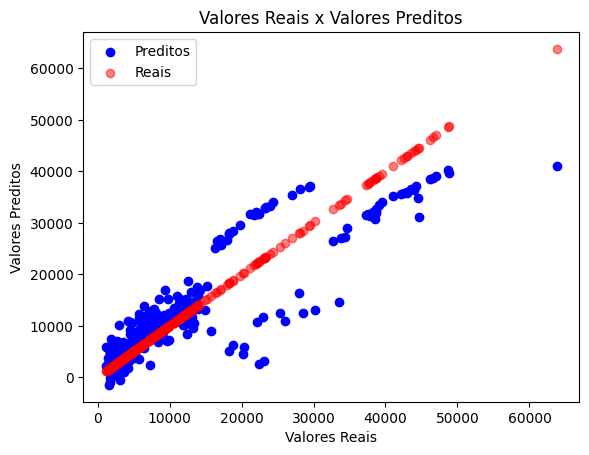

In [13]:
plt.scatter(y_test, y_pred, color='blue', label='Preditos')
plt.scatter(y_test, y_test, color='red', alpha = 0.5, label='Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais x Valores Preditos')
plt.legend()
plt.show()

# Regressão polinomial

In [14]:
y = dados['charges']
X = dados.drop(['charges'], axis = 1)

poly_reg  = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.20, random_state = 42)

lin_reg = LinearRegression()
lin_reg  = lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_test)

mse_poly = mean_squared_error(y_test,y_pred)
mae_poly = mean_absolute_error(y_test,y_pred)
r2_poly = r2_score(y_test,y_pred)

print(f'MSE: {mse_poly}')
print(f'MAE: {mae_poly}')
print(f'R2: {r2_poly}')


MSE: 20530608.942951996
MAE: 2730.315581680438
R2: 0.8677566718537736


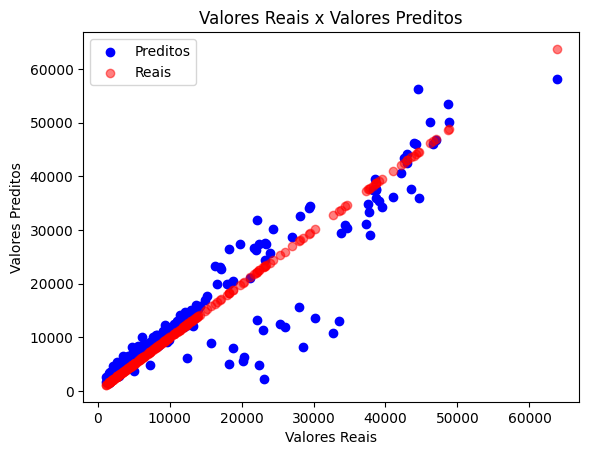

In [15]:
plt.scatter(y_test, y_pred, color='blue', label='Preditos')
plt.scatter(y_test, y_test, color='red', alpha = 0.5, label='Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais x Valores Preditos')
plt.legend()
plt.show()

# Random Forest

In [16]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)

mse_rf = mean_squared_error(y_test,y_pred)
mae_rf = mean_absolute_error(y_test,y_pred)
r2_rf = r2_score(y_test,y_pred)

print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'R2: {r2_rf}')

MSE: 20202265.85915191
MAE: 2413.1496789528346
R2: 0.8698716204310989


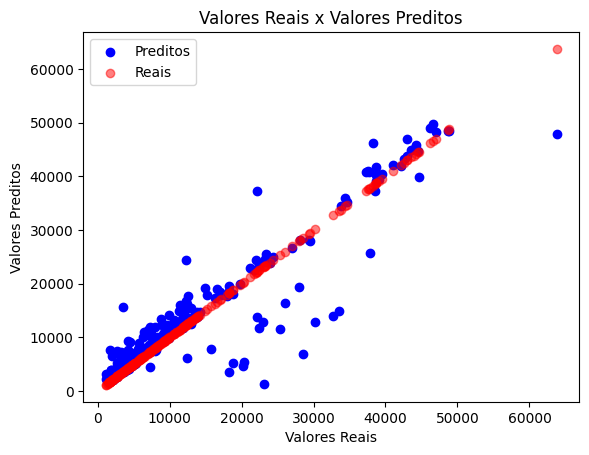

In [17]:
plt.scatter(y_test, y_pred, color='blue', label='Preditos')
plt.scatter(y_test, y_test, color='red', alpha = 0.5, label='Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais x Valores Preditos')
plt.legend()
plt.show()

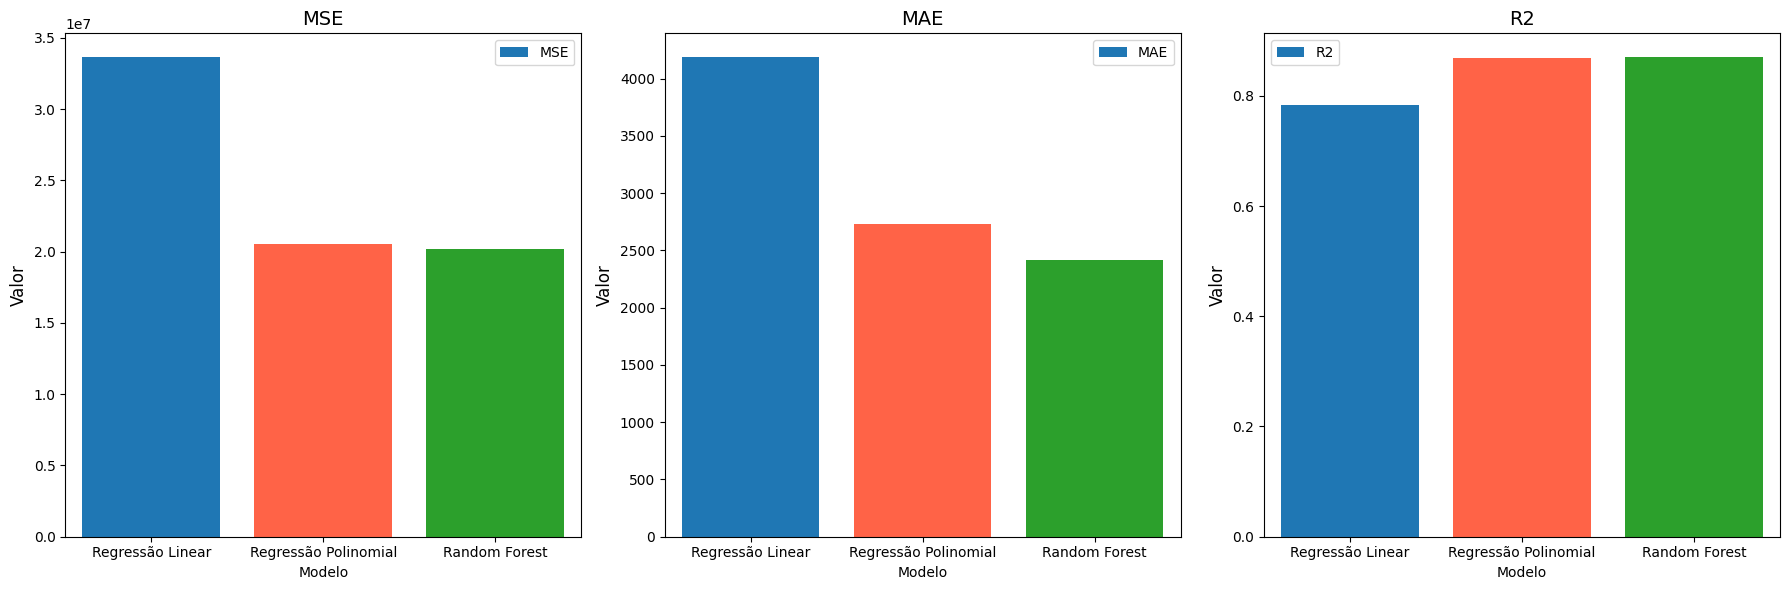

In [18]:
colors = ['#1f77b4', '#ff6347', '#2ca02c']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = {
    "Modelo": ["Regressão Linear", "Regressão Polinomial", "Random Forest"],
    "MSE": [mse_linear, mse_poly, mse_rf],
    "MAE": [mae_linear, mae_poly, mae_rf],
    "R2": [r2_linear, r2_poly, r2_rf]
}

df_metrics = pd.DataFrame(metrics)

# MSE
df_metrics.set_index("Modelo")[["MSE"]].plot(kind="bar", ax=axes[0])
axes[0].set_title("MSE", fontsize=14)
axes[0].set_ylabel("Valor", fontsize=12)
axes[0].set_xticklabels(df_metrics["Modelo"], rotation=0)
axes[0].bar(0, mse_linear, color=colors[0])
axes[0].bar(1, mse_poly, color=colors[1])
axes[0].bar(2, mse_rf, color=colors[2])


# MAE
df_metrics.set_index("Modelo")[["MAE"]].plot(kind="bar", ax=axes[1], color=colors)
axes[1].set_title("MAE", fontsize=14)
axes[1].set_ylabel("Valor", fontsize=12)
axes[1].set_xticklabels(df_metrics["Modelo"], rotation=0)
axes[1].bar(0, mae_linear, color=colors[0])
axes[1].bar(1, mae_poly, color=colors[1])
axes[1].bar(2, mae_rf, color=colors[2])

# R2
df_metrics.set_index("Modelo")[["R2"]].plot(kind="bar", ax=axes[2], color=colors)
axes[2].set_title("R2", fontsize=14)
axes[2].set_ylabel("Valor", fontsize=12)
axes[2].set_xticklabels(df_metrics["Modelo"], rotation=0)
axes[2].bar(0, r2_linear, color=colors[0])
axes[2].bar(1, r2_poly, color=colors[1])
axes[2].bar(2, r2_rf, color=colors[2])

plt.tight_layout()
plt.show()
